In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_dataset = load_iris()

print("Target names:", iris_dataset['target_names'])
print("Feature names:\n", iris_dataset['feature_names'])
print("Type of data:", type(iris_dataset['data']))
print("Shape of data:", iris_dataset['data'].shape)
print("=============================")
print("Type of target:", type(iris_dataset['target']))
print("Shape of target:", iris_dataset['target'].shape)

Target names: ['setosa' 'versicolor' 'virginica']
Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)


In [22]:
import pandas as pd
import numpy as np
feature_columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
df=pd.DataFrame(data=np.c_[iris_dataset['data'],iris_dataset['target']], columns=iris_dataset['feature_names']+['target'])
df['target']=df['target'].map({0:'setosa',1:"versicolor",2:"virginica"})
X=df.iloc[:,:-1].values
y=df.iloc[:,[-1]].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)

In [25]:
temp_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

In [26]:
pca_df = pd.concat([temp_df, df[['target']]], axis = 1)
print(pca_df.head(10))
print(pca.explained_variance_ratio_)

   principal component 1  principal component 2  target
0              -2.264703               0.480027  setosa
1              -2.080961              -0.674134  setosa
2              -2.364229              -0.341908  setosa
3              -2.299384              -0.597395  setosa
4              -2.389842               0.646835  setosa
5              -2.075631               1.489178  setosa
6              -2.444029               0.047644  setosa
7              -2.232847               0.223148  setosa
8              -2.334640              -1.115328  setosa
9              -2.184328              -0.469014  setosa
[0.72962445 0.22850762]


<function matplotlib.pyplot.show(*args, **kw)>

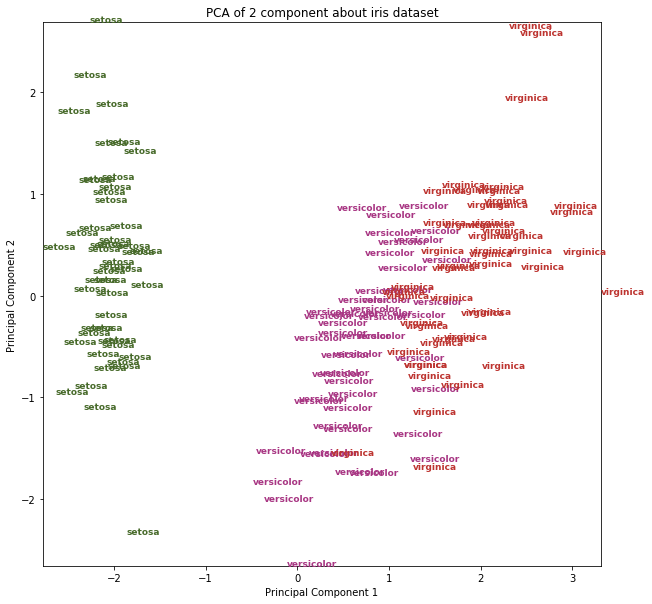

In [27]:
import matplotlib.pyplot as plt
# targets = ['setosa', 'versicolor', 'virginica']
# colors = ['g', 'b', 'r']
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of 2 component about iris dataset')
# for target, color in zip(targets,colors):
#     index = data_df['target'] == target
#     plt.scatter(data_df.loc[index, 'principal component 1'], data_df.loc[index, 'principal component 2']
#                , color = color, s = 2000, marker=r"$ {} $".format(target))

targets = ['setosa', 'versicolor', 'virginica']
colors = ['#476A2A', '#A83683', '#BD3430']
plt.figure(figsize=(10,10))
plt.xlim(pca_df['principal component 1'].min(),pca_df['principal component 1'].max())
plt.ylim(pca_df['principal component 2'].min(),pca_df['principal component 2'].max())
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 2 component about iris dataset')

for target, color in zip(targets,colors):
    index = pca_df['target'] == target
    for i in range(len(pca_df.loc[index, 'principal component 1'].values)):
        plt.text(pca_df.loc[index, 'principal component 1'].values[i], 
                 pca_df.loc[index, 'principal component 2'].values[i],
                 s=target,color = color, fontdict={'weight':'bold','size':9})

plt.show


In [28]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, learning_rate=200)
X_tsne = tsne.fit_transform(X)

In [29]:
temp_df = pd.DataFrame(data = X_tsne, columns = ['t-SNE feature 1', 't-SNE feature 2'])
tsne_df = pd.concat([temp_df, df[['target']]], axis = 1)
tsne_df.head(10)

,t-SNE feature 1,t-SNE feature 2,target
0,12.336440,17.223604,setosa
1,11.876715,19.901878,setosa
2,12.990252,19.780256,setosa
3,12.639502,20.223818,setosa
4,11.931263,17.202948,setosa
5,11.977342,15.286099,setosa
6,13.387560,19.548372,setosa
7,12.388301,17.973022,setosa
8,12.692148,20.970844,setosa
9,12.004171,19.391663,setosa


<function matplotlib.pyplot.show(*args, **kw)>

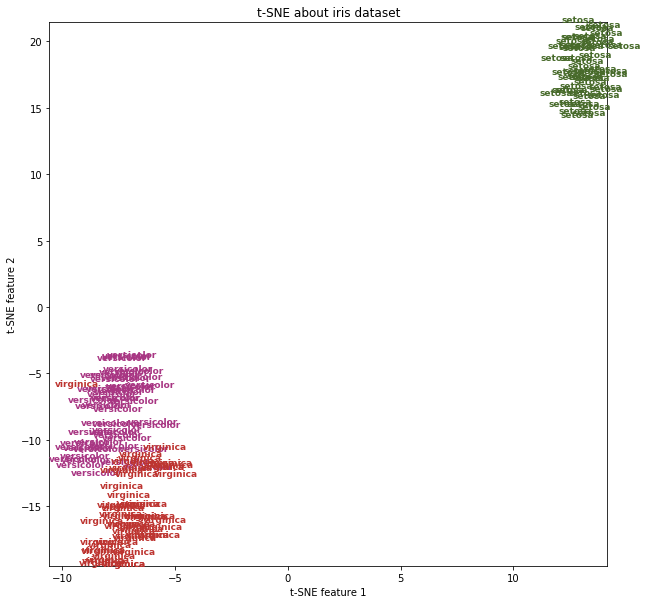

In [30]:
import matplotlib.pyplot as plt

targets = ['setosa', 'versicolor', 'virginica']
colors = ['#476A2A', '#A83683', '#BD3430']
plt.figure(figsize=(10,10))
plt.xlim(tsne_df['t-SNE feature 1'].min(),tsne_df['t-SNE feature 1'].max())
plt.ylim(tsne_df['t-SNE feature 2'].min(),tsne_df['t-SNE feature 2'].max())
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE about iris dataset')

for target, color in zip(targets,colors):
    index = tsne_df['target'] == target
    for i in range(len(tsne_df.loc[index, 't-SNE feature 1'].values)):
        plt.text(tsne_df.loc[index, 't-SNE feature 1'].values[i], 
                 tsne_df.loc[index, 't-SNE feature 2'].values[i],
                 s=target,color = color, fontdict={'weight':'bold','size':9})
plt.show